In [1]:
import os
import re
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.it'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyArrow
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point
from matplotlib.legend_handler import HandlerBase,HandlerTuple
from matplotlib.lines import Line2D
from scipy.stats import linregress
from matplotlib.colors import LinearSegmentedColormap, Normalize, TwoSlopeNorm
from matplotlib import gridspec

In [2]:
blue=(0,77/255,168/255)
yellow=(255/255,177/255,0)
green=(38/255,115/255,0)
orange=(230/255,76/255,0)
d_yellow=(225/255,157/255,86/255)
d_orange=(200/255,75/255,49/255)
dark=(51/255,55/255,44/255)
grid_gray=(88/255, 88/255, 88/255)
red=(168/255,8/255,0)
qing=(0,128/255,128/255)

# Fig.1.c

In [28]:
d_file=pd.read_excel('Fig1.xlsx',sheet_name='1c',index_col=0)

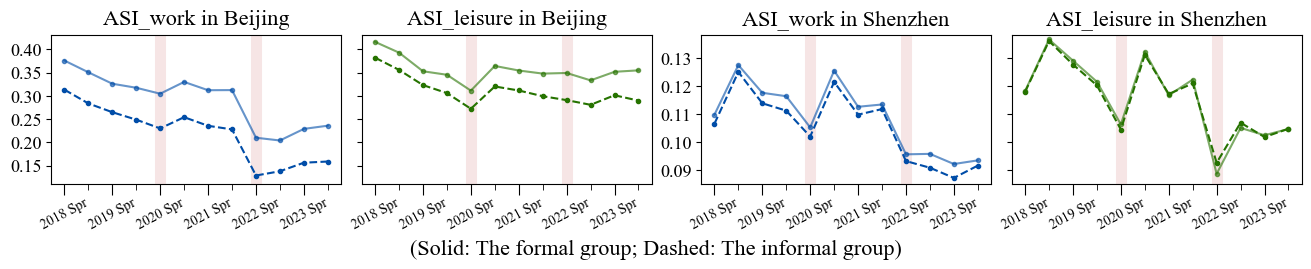

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(13, 2.3), sharex=True, constrained_layout=True)

colors = [blue, green]
all_lines = []
title_bj = ['ASI_work in Beijing', 'ASI_leisure in Beijing']

for i in range(2):
    ax = axes[i] 
    ax.axvline(x=4, color=red, alpha=0.1, linewidth=8)
    ax.axvline(x=8, color=red, alpha=0.1, linewidth=8)
    d_file.iloc[:,2 * i].plot(ax=ax, kind='line', color=colors[i], marker='.', alpha=0.6, legend=False)
    d_file.iloc[:,2 * i + 1].plot(ax=ax, kind='line', color=colors[i], marker='.', style='--', legend=False)
    ax.set_title(title_bj[i],fontsize=16, pad=8)
    all_lines.extend(ax.get_lines())
    ax.set_yticks([0.15,0.20,0.25,0.30,0.35,0.40])
    ax.set_yticklabels(['0.15','0.20','0.25','0.30','0.35','0.40'],fontsize=13)
    ax.set_ylim(0.11, 0.43)

title_sz = ['ASI_work in Shenzhen', 'ASI_leisure in Shenzhen']
for i in range(2):
    ax = axes[i+2]
    ax.axvline(x=4, color=red, alpha=0.1, linewidth=8)
    ax.axvline(x=8, color=red, alpha=0.1, linewidth=8)
    d_file.iloc[:,2 * i+4].plot(ax=ax, kind='line', color=colors[i], marker='.', alpha=0.6, legend=False)
    d_file.iloc[:,2 * i+5].plot(ax=ax, kind='line', color=colors[i], marker='.', style='--', legend=False)
    ax.set_title(title_sz[i],fontsize=16, pad=8)
    all_lines.extend(ax.get_lines()) 
    ax.set_yticks([0.09,0.1,0.11,0.12,0.13])
    ax.set_yticklabels(['0.09','0.10','0.11','0.12','0.13'],fontsize=13)
    ax.set_ylim(0.085, 0.138)

major_ticks = [0, 2, 4, 6, 8, 10]
minor_ticks = [1, 3, 5, 7, 9, 11]

for ax in axes:
    ax.set_xticks(major_ticks) 
    ax.set_xticks(minor_ticks, minor=True)
    ax.tick_params(axis='x', which='major', length=8)
    ax.tick_params(axis='x', which='minor', length=4)
    ax.set_xticklabels(['2018 Spr','2019 Spr', '2020 Spr','2021 Spr', '2022 Spr', '2023 Spr'], rotation=28,fontsize=10,va='center_baseline')

axes[1].tick_params(axis='y', labelleft=False)
axes[3].tick_params(axis='y', labelleft=False)

fig.text(0.5,-0.06,s='(Solid: The formal group; Dashed: The informal group)',fontsize=16,ha='center',va='center')

plt.savefig('Fig1c', dpi=600, bbox_inches='tight')

# Fig.1.d

In [30]:
covid=pd.read_excel('Fig1.xlsx',sheet_name='1d')
covid=covid.iloc[6:,:].reset_index(drop=True)
covid.columns=['period','BJ1','GD1','BJ2','GD2']
month_idx=pd.read_excel('Fig1.xlsx',sheet_name='month')
df=covid
df['period'] = pd.to_datetime(df['period'])
df['year_month'] = df['period'].dt.to_period('M') 

month_df = df.groupby('year_month').agg({
    'BJ1': 'mean', 
    'GD1': 'mean',
    'BJ2': 'max', 
    'GD2': 'max'  
}).reset_index()
month_df=pd.merge(month_idx,month_df,left_index=True,right_index=True)
for i in range(len(month_df)):
    if i==0:
        month_df.loc[i,'BJ3']=month_df.loc[i,'BJ2']
        month_df.loc[i,'GD3']=month_df.loc[i,'GD2']
    else:
        month_df.loc[i,'BJ3']=month_df.loc[i,'BJ2']-month_df.loc[i-1,'BJ2']
        month_df.loc[i,'GD3']=month_df.loc[i,'GD2']-month_df.loc[i-1,'GD2']

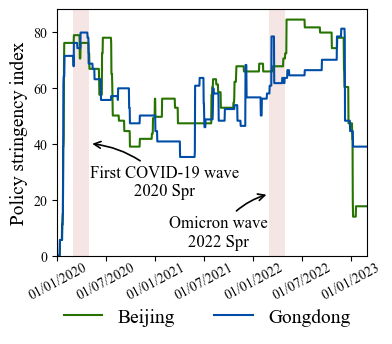

In [31]:
fig, ax= plt.subplots(figsize=(4, 3.2))
ax.axvspan(60, 120, facecolor=red,edgecolor='None', alpha=0.1)
ax.axvspan(790, 850, facecolor=red,edgecolor='None', alpha=0.1)
df=df.rename(columns={'BJ1':'Beijing','GD1':'Gongdong'})
df[['Beijing','Gongdong']].plot(ax=ax,kind='line',color=[green,blue],legend=False)
ax.set_xticks([0,182,366,547,731,912,1096])
ax.set_xticklabels(['01/01/2020','01/07/2020','01/01/2021','01/07/2021','01/01/2022','01/07/2022','01/01/2023'],va='center_baseline', rotation=28)
fig.legend(ax.get_lines(), ['Beijing','Gongdong'],
           loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False,prop={'size':14})
# ax.set_title('Shenzhen')
ax.set_ylim(0,88)
ax.set_xlim(0,1156)
ax.set_ylabel('Policy stringency index',fontdict={'size': 14})
ax.annotate(
    "First COVID-19 wave\n2020 Spr",
    xy=(120, 40),   
    xytext=(400, 20), 
    arrowprops=dict(
        arrowstyle="->",     
        connectionstyle="arc3,rad=0.2",
        lw=1.2    
    ),fontsize=12,va="bottom",ha="center")
ax.annotate(
    "Omicron wave\n2022 Spr", 
    xy=(790, 22),           
    xytext=(600, 2),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-0.2",
        lw=1.2 
    ),fontsize=12,va="bottom",ha="center")
plt.savefig('Fig1d',dpi=500, bbox_inches='tight')

# Fig.4

In [16]:
data = {sheet: pd.ExcelFile('Fig4.xlsx').parse(sheet) for sheet in pd.ExcelFile('Fig4.xlsx').sheet_names}
for sheet, df in data.items():
    df.rename(columns={'Unnamed: 0': 'Period'}, inplace=True)

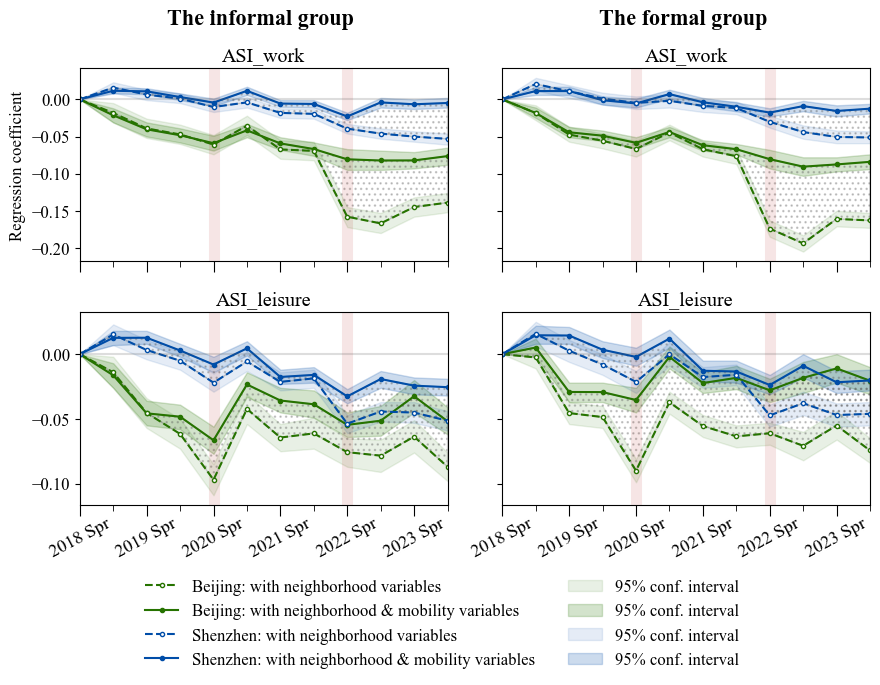

In [17]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(9, 5.5), sharex=True)
title = ['ASI_work', 'ASI_work',
         'ASI_leisure', 'ASI_leisure']
target = ['ifw', 'fw', 'ifl', 'fl']

handles, labels = [], []

for i in range(4):
    row,col=divmod(i, 2)
    ax = axes[row, col]
    
    df_bj_temp = data['bj_'+target[i]]
    df_sz_temp = data['sz_'+target[i]]
    x = df_bj_temp['Period']
    t1 = df_bj_temp['r']
    t1u = df_bj_temp['r_up']
    t1d = df_bj_temp['r_down']
    t = df_bj_temp['rm']
    tu = df_bj_temp['rm_up']
    td = df_bj_temp['rm_down']

    s1 = df_sz_temp['r']
    s1u = df_sz_temp['r_up']
    s1d = df_sz_temp['r_down']
    s = df_sz_temp['rm']
    su = df_sz_temp['rm_up']
    sd = df_sz_temp['rm_down']
    
    ax.axvline(x=4, color=red, alpha=0.1, linewidth=8)
    ax.axvline(x=8, color=red, alpha=0.1, linewidth=8)

    line1 = ax.plot(x, t, color=green, label='Beijing: with neighborhood variables',marker='.')
    line2 = ax.plot(x, t1, color=green, linestyle='--', label='Beijing: with neighborhood & mobility variables',marker='.',markerfacecolor='white')

    line3 = ax.plot(x, s, color=blue, label='Shenzhen: with neighborhood variables',marker='.')
    line4 = ax.plot(x, s1, color=blue, linestyle='--', label='Shenzhen: with neighborhood & mobility variables',marker='.',markerfacecolor='white')

    fill1 = ax.fill_between(x, td, tu, alpha=0.2, color=green, label='95% conf. interval')
    fill2 = ax.fill_between(x, t1d, t1u, alpha=0.1, color=green, label='95% conf. interval')

    fill3 = ax.fill_between(x, sd, su, alpha=0.2, color=blue, label='95% conf. interval')
    fill4 = ax.fill_between(x, s1d, s1u, alpha=0.1, color=blue, label='95% conf. interval')

    ax.fill_between(x, t, t1, alpha=0.3, hatch='...', edgecolor=grid_gray, facecolor='none')
    ax.fill_between(x, s, s1, alpha=0.3, hatch='...', edgecolor=grid_gray, facecolor='none')

    ax.axhline(y=0, alpha=0.2, color=grid_gray)

    if not col and row==0:
        ax.set_ylabel('Regression coefficient')
    ax.set_title(title[i])
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation=38)
major_ticks = [0, 2, 4, 6, 8, 10]
minor_ticks = [1, 3, 5, 7, 9, 11]

y_min = min([ax.get_ylim()[0] for ax in axes[0, :]])-0.001
y_max = max([ax.get_ylim()[1] for ax in axes[0, :]])+0.001
for ax in axes[0, :]:
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(0, 11)
    ax.set_yticks([0,-0.05,-0.1,-0.15,-0.2])
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.tick_params(axis='x', which='major', length=8)
    ax.tick_params(axis='x', which='minor', length=4)

y_min = min([ax.get_ylim()[0] for ax in axes[1, :]])-0.001
y_max = max([ax.get_ylim()[1] for ax in axes[1, :]])+0.001
for ax in axes[1, :]:
    ax.set_ylim(y_min, y_max)
    ax.set_yticks([0,-0.05,-0.1])
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.tick_params(axis='x', which='major', length=8)
    ax.tick_params(axis='x', which='minor', length=4)
    ax.set_xticklabels(['2018 Spr','2019 Spr', '2020 Spr','2021 Spr', '2022 Spr', '2023 Spr'], rotation=28,fontsize=13,va='center_baseline')

axes[0, 1].set_yticklabels([])
axes[1, 1].set_yticklabels([])

handles.extend(line2 + line1 + line4 + line3 + [fill2, fill1, fill4, fill3])
labels.extend(['Beijing: with neighborhood variables', 'Beijing: with neighborhood & mobility variables',
               'Shenzhen: with neighborhood variables', 'Shenzhen: with neighborhood & mobility variables',
               '95% conf. interval', '95% conf. interval', '95% conf. interval', '95% conf. interval'])

fig.text(0.298, 0.998, 'The informal group', fontsize=16, va='bottom', ha='center', weight='bold')
fig.text(0.768, 0.998, 'The formal group', fontsize=16, va='bottom', ha='center', weight='bold')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.025), ncol=2, frameon=False)

plt.tight_layout()
plt.savefig('Fig4', dpi=600, bbox_inches='tight')
plt.rcParams['font.size'] = plt.rcParamsDefault['font.size']

# Fig.5.a

In [26]:
data1=pd.read_excel('Fig5.xlsx',sheet_name='5a',header=0,index_col=0)
data_all=data1/data1.sum(axis=0)

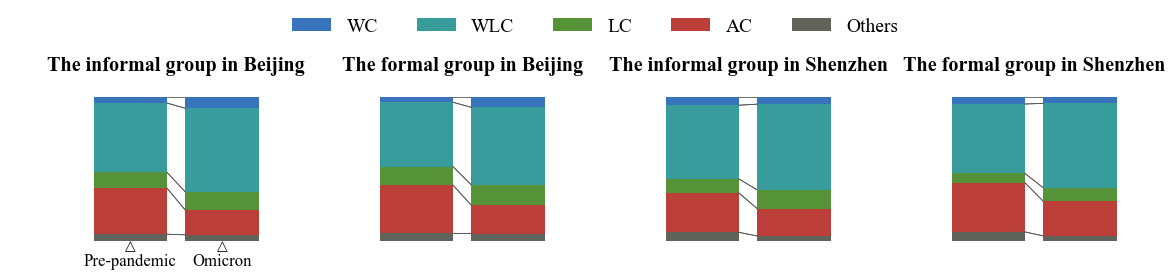

In [27]:
colors = [blue,qing,green,red,dark]

group_gap = 0.78
bar_gap = 0.25

x_offsets = [i * group_gap for i in range(4)]
name=['The informal group in Beijing','The formal group in Beijing','The informal group in Shenzhen','The formal group in Shenzhen']
fig, ax = plt.subplots(figsize=(12, 2.5))

for g, x_base in zip(range(4), x_offsets):
    x1 = x_base - bar_gap / 2
    x2 = x_base + bar_gap / 2

    bottom_1 = 0
    bottom_2 = 0

    for i in range(5):
        h1 = data_all.iloc[4-i,2*g]
        h2 = data_all.iloc[4-i,2*g+1]

        ax.bar(x1, h1, bottom=bottom_1, width=0.2, color=colors[4-i], alpha=0.78)
        ax.bar(x2, h2, bottom=bottom_2, width=0.2, color=colors[4-i], alpha=0.78)
        ax.plot([x1 + 0.1, x2 - 0.1], [bottom_1 + h1, bottom_2 + h2], color=grid_gray, linewidth=0.6)
        ax.plot([x1 + 0.1, x2 - 0.1], [bottom_1, bottom_2], color=grid_gray, linewidth=0.6)
        bottom_1 += h1
        bottom_2 += h2
    if g==0:
        plt.rcParams['font.family'] = 'DejaVu Sans'
        ax.text(x1, 0.015, '△', ha='center', va='top', fontsize=10)
        ax.text(x2, 0.015, '△', ha='center', va='top', fontsize=10)
        matplotlib.rcParams['font.family'] = 'Times New Roman'
        ax.text(x1, -0.083, 'Pre-pandemic', ha='center', va='top', fontsize=12)
        ax.text(x2, -0.083, 'Omicron', ha='center', va='top', fontsize=12)
    ax.text((x1+x2)/2, 1.15, name[g], ha='center', va='bottom', fontsize=14.5,weight='bold')

ax.set_xlim(-0.4, 2.6)
ax.set_ylabel(' ')
ax.set_frame_on(False) 
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([]) 
ax.set_yticklabels([]) 
fig.legend([ax.patches[li] for li in [8,6,4,2,0]],['WC','WLC','LC','AC','Others'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, frameon=False, fontsize=14)
record=[ax.patches[li] for li in [8,6,4,2,0]]

plt.tight_layout()
plt.savefig('Fig5a',dpi=600, bbox_inches='tight')

# Fig.5.b

In [18]:
bjv=pd.read_excel('Fig5.xlsx',sheet_name='5b_bj',header=0)
szv=pd.read_excel('Fig5.xlsx',sheet_name='5b_sz',header=0)
bjv1=bjv[bjv['rid']==1].reset_index(drop=True)
bjv2=bjv[bjv['rid']==2].reset_index(drop=True)
szv1=szv[szv['rid']==1].reset_index(drop=True)
szv2=szv[szv['rid']==2].reset_index(drop=True)

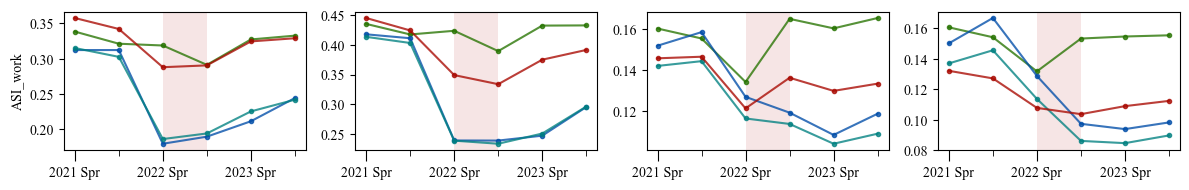

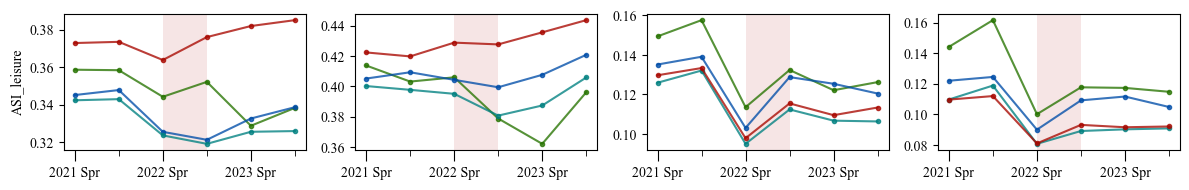

In [22]:
dfs=[bjv1,bjv2,szv1,szv2]
major_ticks=[0,2,4]
minor_ticks=[1,3,5]
labels=['ASI_work','ASI_leisure']
for target in ['asi_work','asi_leisure']:
    fig, axes= plt.subplots(1,4,figsize=(12, 2))
    for i in range(4):
        temp_df=dfs[i].sort_values(['cr','cw','cl','month']).reset_index(drop=True)
        temp_df.iloc[6:12,:].reset_index(drop=True)[target].plot(ax=axes[i],color=green,marker='.', alpha=0.78)
        temp_df.iloc[12:18,:].reset_index(drop=True)[target].plot(ax=axes[i],color=blue,marker='.', alpha=0.78)
        temp_df.iloc[18:24,:].reset_index(drop=True)[target].plot(ax=axes[i],color=(0,128/255,128/255),marker='.', alpha=0.78)
        temp_df.iloc[42:48,:].reset_index(drop=True)[target].plot(ax=axes[i],color=red,marker='.', alpha=0.78)         
        axes[i].set_xticks(major_ticks)
        axes[i].set_xticks(minor_ticks, minor=True)
        axes[i].tick_params(axis='x', which='major', length=8)
        axes[i].tick_params(axis='x', which='minor', length=4)
        axes[i].set_xticklabels(['2021 Spr', '2022 Spr', '2023 Spr'],fontsize=10)
        axes[i].axvspan(2, 3, facecolor=red, edgecolor='None', alpha=0.1)
    if target=='asi_work':
        axes[1].set_yticks([0.25,0.30,0.35,0.4,0.45])
        axes[3].set_yticks([0.08,0.10,0.12,0.14,0.16])
        axes[0].set_ylabel(labels[0])
    if target=='asi_leisure':
        axes[1].set_yticks([0.36,0.38,0.40,0.42,0.44])
        axes[3].set_yticks([0.08,0.10,0.12,0.14,0.16])
        axes[0].set_ylabel(labels[1])
    
    plt.tight_layout()
    plt.savefig('Fig5b_'+target,dpi=600, bbox_inches='tight')

# Fig.5.c

In [24]:
data3=pd.read_excel('Fig5.xlsx',sheet_name='5c',header=0,index_col=0)

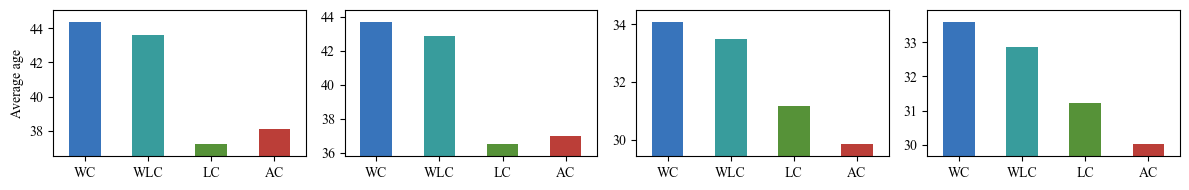

In [25]:
fig, axes= plt.subplots(1,4,figsize=(12, 2))
axes[0].set_ylabel('Average age')
for i in range(4):
    df=data3.iloc[:,i]
    y_min = df.min()
    y_max = df.max()
    padding = (y_max - y_min) * 0.1 
    df.plot(ax=axes[i],kind='bar',rot=0,color=[blue,qing,green,red],alpha=0.78)
    axes[i].set_ylim(y_min - padding, y_max + padding)  

plt.tight_layout()
plt.savefig('Fig5c',dpi=600, bbox_inches='tight')